# Introduction
**The aim of the project** is to apply data mining techniques to extract interesting patterns from the **Census income dataset** and evaluate the performance of the models used.

The dataset was extracted from https://archive.ics.uci.edu/dataset/20/census+income, which contains 32561 rows and 15 features.

In [96]:
# First, I will load the needed Python libraries

# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

#Now read the dataset and 
# show first few rows of data

names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("adult.data", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data cleaning

We can first look at the data types for each column and check if there are missing or null values.
Then, we can examine the summary statistics for each quantitative data column.

In [97]:
print(f"Amout of samples: {len(df)}")

df.info()
df.describe()

def categorical_feature_analysis(df, var_name):
  print('Unique values of feature %s:\n%s\n'  % (var_name, df[var_name].unique())) #feature's unique values

# Let's look at the unique values for each categorical variable.
categorical_feature_analysis(df,'workclass')
categorical_feature_analysis(df,'marital_status')
categorical_feature_analysis(df,'occupation')
categorical_feature_analysis(df,'relationship')
categorical_feature_analysis(df,'race')
categorical_feature_analysis(df,'sex')
categorical_feature_analysis(df,'native_country')
categorical_feature_analysis(df,'income')


Amout of samples: 32561
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Unique values of feature workclass:
[' State-gov' ' Self-emp-not-inc'

There are no null data in any of the dataset columns. However, there are unknown data (information) in the 'workclass', 'occupation', 'native_country' and columns indicated by the symbol '?'. I will change these instances to of "?" symbol to "Unknown", for better interpretation and cleaner representation.

Additionally, the education feature is a duplicate feature of education_num, but in a nonnumerical format. I will remove this column to clean the data.

The matching education level of the education number:

**1**: Preschool, **2**: 1st-4th, **3**: 5th-6th, **4**: 7th-8th, **5**: 9th, **6**: 10th, **7**: 11th, **8**: 12th, **9**: HS-grad,**10**: Some-college, **11**: Assoc-voc, **12**: Assoc-acdm, **13**: Bachelors, **14**: Masters, **15**: Prof-school, **16**: Doctorate .

In [98]:
# drop uneeded columns
df.drop('education', inplace=True, axis=1)

# changing "?" to Unknown
change_columns = ['workclass', 'occupation', 'native_country']
for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

Finally, we check if there are duplicate rows in the dataset. If there are, we remove them to make the dataset more realistic.

In [99]:
# check duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())
#There are 24 duplicate rows in our dataset.
df = df[~df.duplicated()]
print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


# Exploratory Data Analysis

# Classification method:

## A interesting prediction that can be possibly made from this dataset is:

**1. Does an individual make more than 50k income?**

To answer this, first let us visually look at the distribution of the numerical variables as a function of income group, so that we may have an idea what are the most important features that help to define the income of an individual.


Numerical Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


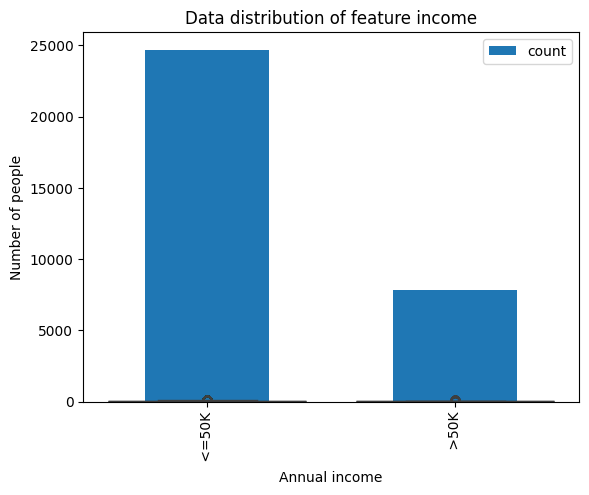

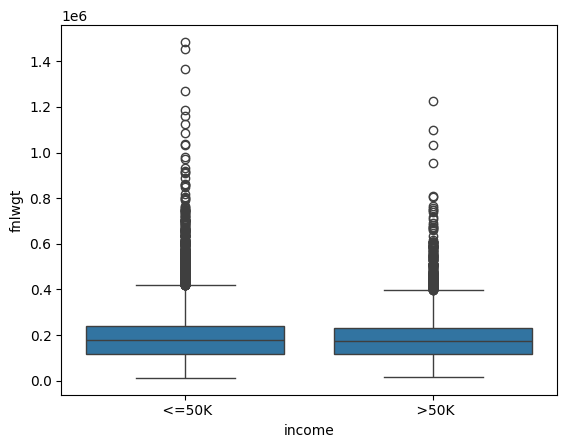

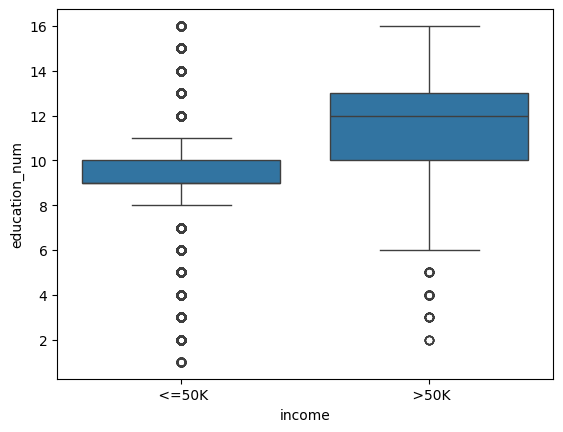

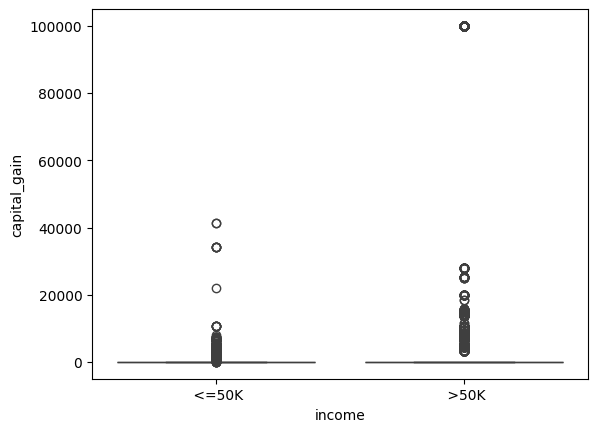

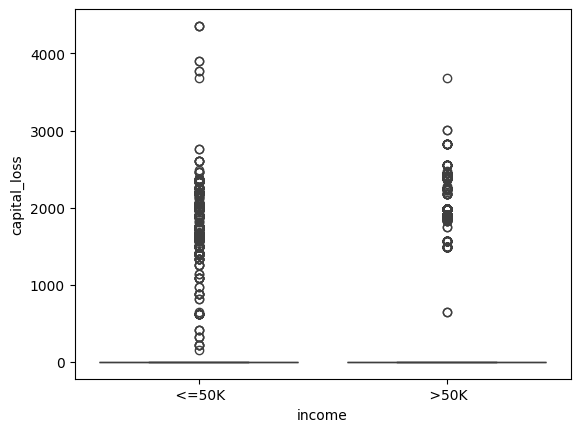

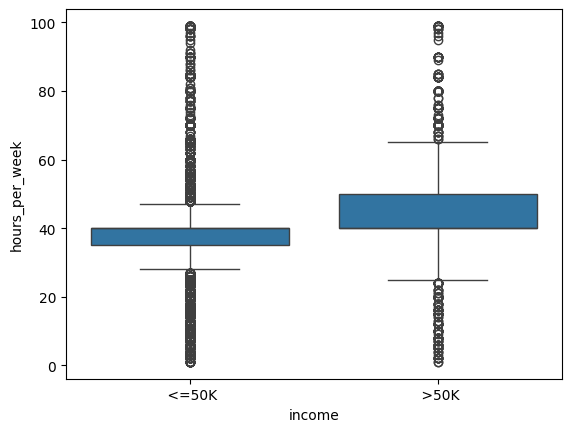

In [100]:
def get_num_feature():
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    features = df.select_dtypes(include=numerics).columns.to_list()
    return features
num_features = get_num_feature()
print(f"Numerical Features: {num_features}")

def univariate_analysis(feature):
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(x=feature, data=df, ax=axes[0])
    sns.boxplot(x=feature, data=df, ax=axes[1])
    plt.show()

#plot distribution of income classes
var='income'
ax=df[var].value_counts().plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of people')
ax.set_xlabel('Annual income')
ax.set_xticklabels(labels=[' <=50K', ' >50K'])

# For each quantitative variable, look at distribution

for feature in num_features:
    sns.boxplot(y=feature, x='income', data=df)
    plt.show()



# Feature income
The dataset is somewhat unbalanced, in that there are more people with income <=50K than those with more >50k.

# Feature *Age*
The feature 'Age' seems to have unbalanced data, where most data points are within the range 28-50, and some outliers > 80. From visual inspection, older people tend to have slightly more income than younger individuals, but the boxplots are overlapping so other features might also be important.


# Feature *fnlwgt*
represents the estimated final weight of each person. The weight means that if two samples share similar fnlwgt, they also share similar characteristics. Regarding the relationship between features fnlwgt and income, the boxplots for both income classes does not show notable differences in *fnlwgt*. This may indicate that fnlwgt is not so useful for the model. There are also outliers in this feature for both income groups.

# Feature *education_num*
There is some indication that people with higher level education are more likely to make over 50k.

# hours per week
There is also some indication that people with higher working hours are more likely to make over 50k.


Now, let us examine how some of the categorical variables might explain income differences:

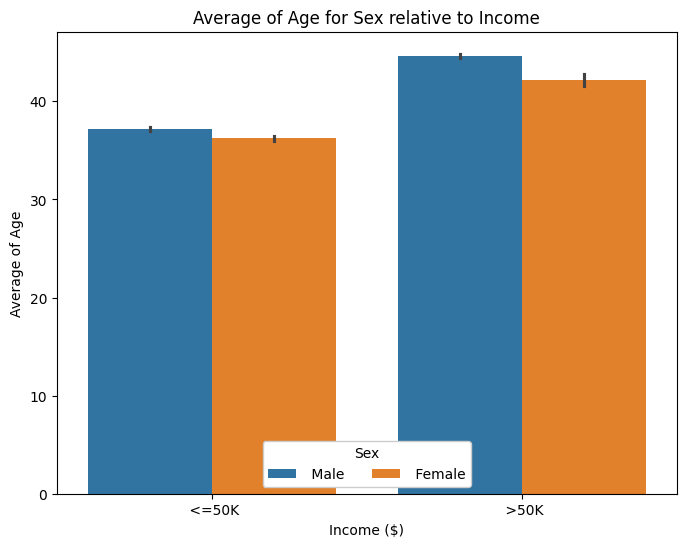

In [101]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

**Males tend to make a little bit higher than females.**

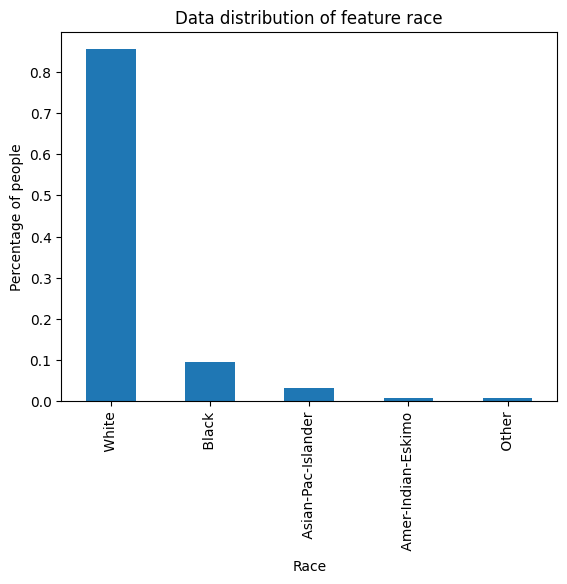

Text(0, 0.5, 'Percentage of People (normalized by class)')

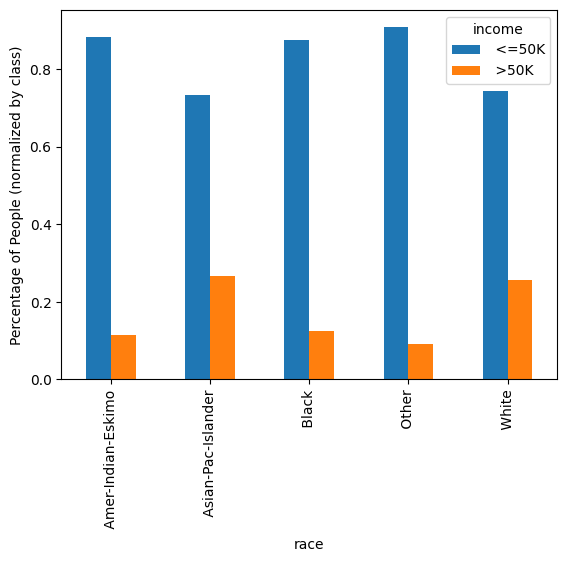

In [75]:
# plot N by race
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Race')
ax.set_xticklabels(labels=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
plt.show()


##plot distribution of race by income
var='race'

pd.crosstab([df[var]], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

**Very unbalanced data values, where most people are white, followed by next highest datapoints in black people. Considering the large number of white people compared to other races, it's not possible to note a clear trend that these people are more likely to make more.**

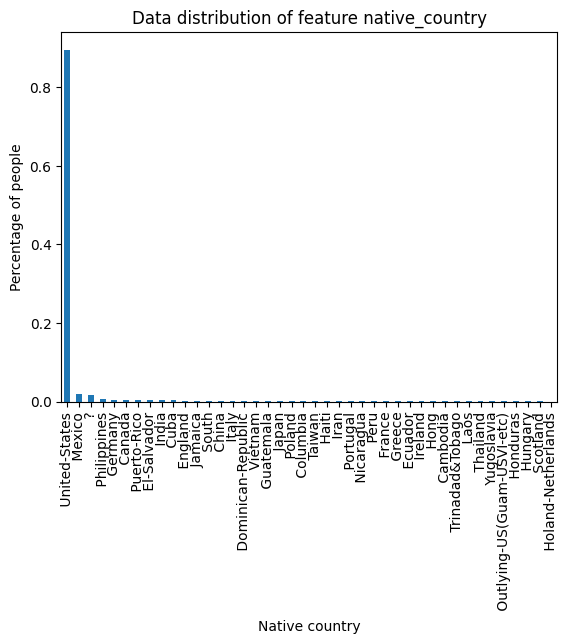

income,<=50K,>50K
native_country,,
?,0.749571,0.250429
Cambodia,0.631579,0.368421
Canada,0.677686,0.322314
China,0.733333,0.266667
Columbia,0.966102,0.033898
Cuba,0.736842,0.263158
Dominican-Republic,0.971429,0.028571
Ecuador,0.857143,0.142857
El-Salvador,0.915094,0.084906


In [84]:
# Plot N of country
var='native_country'

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Native country')
plt.show()

pd.crosstab([df[var]], df['income'], normalize='index')


**Very unbalanced data values, where most people were born in the United States. Considering the large number of people that were born in the United States compared to other countries, it's not possible to note a clear trend that these people are more likely to make more.**

# Data preprocessing

## I will first split the target class (i.e., Income) from other attributes

In [102]:
# Encode the outcome variable as 1 and 0
y = df.income.replace({" <=50K": 0, " >50K": 1}) # target
X = df.drop(["income"], axis= 1)

## Split features into numerical and Categorical

In [104]:
numerical_features = X.select_dtypes(include="number")
categorical_features = X.select_dtypes(include="object")

# Detect if any numerical feature has low variation
def unique_levels(x):
    x = x.value_counts().count()
    return x

df_value_counts = pd.DataFrame(numerical_features.apply(lambda x: unique_levels(x)))
df_value_counts.columns = ["feature_levels"]
df_value_counts

,feature_levels
age,73
fnlwgt,21648
education_num,16
capital_gain,119
capital_loss,92
hours_per_week,94


## Outlier Analysis of Numerical Features

For numerical features, identify outliers and discard them using extreme percentile values (lower than 0.01, higher than 0.99) as threshold.

In [110]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,0.90, 0.99])

def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

numerical_features = numerical_features.apply(lambda x: outlier_cap(x))

## Numerical data scaling

**Remove features that has 0 variance**

In [111]:
vt = VarianceThreshold(threshold=0)
vt.fit_transform(numerical_features)

# get columns to keep and create new dataframe with those only
cols = vt.get_support(indices=True)
num_feat_none_var = numerical_features.iloc[:,cols]

num_feat_none_var.iloc[0]

age                  39.0
fnlwgt            77516.0
education_num        13.0
capital_gain       2174.0
capital_loss          0.0
hours_per_week       40.0
Name: 0, dtype: float64

**I will scale the data to MinMaxScalling for numerical features, which converts the data to have a range between 0 and 1. This will help to make the data well-prepared for the model.**

In [114]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']

scaler = MinMaxScaler()
X[numerical] = scaler.fit_transform(X[numerical])

## Categorical feature encoding
**I will encode and create dummy variables using the hot-encoding approach for the categorical features, to make it as numerical data. It helps for easier processing and more numerical representation.**

In [116]:
# Encoding
X['sex'] = X.sex.replace({"Female": 0, "Male": 1})

# Create dummy variables
X = pd.get_dummies(X)

In [117]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


## Splitting to training and testing


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Conduct a RandomForestClassifier to predict income
**A Random forest is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

In [119]:
models = {}

# models with default parameter
models['RandomForest'] = RandomForestClassifier()

# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")


RandomForest:
Accuracy: train:  0.99993853157698 | test:  0.8567478274307023
F1-score: train:  0.9998724184668186 | test:  0.6769203852215517
---------------------------------------------------------


**During our exploration of the dataset it surfaced that there is an imbalance between the classes of classifications: individuals making less than 50k as income represent 75% of the data. One way to fight this issue is to generate new samples in the classes which are under-represented (>50K income). The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. This is called Oversampling, it is a technique used to modify unequal data classes to create balanced data sets. 

To artificailly overcome imbalance in income classes, I will rerun  the random forest classifier with oversampling:**

In [122]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999746944353063 | test:  0.9362703141206985
F1-score: train:  0.9999746949475907 | test:  0.9392486261169456


### Metrics used for Evaluation:

I have used the accuracy metric for the evaluation of the RandomForestModel. The accuracy metric is described as the ratio between the number of correct predictions and the total number of predictions:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

For binary classification such as this dataset, accuracy can also be calculated in terms of the confusion matrix terminology:

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

F1-score has been used as one of the metrics in the experiment, it can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

The formula for the F1 score is:

$$\text{F1} = \frac{2 * (precision * recall)}{(precision + recall)}$$

# Summary of classification model

## Get importance of individual features

In [124]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [127]:
# Partioning the data
Xc = df.drop('income', axis=1)
yc = df['income']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)

# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,age,14.562505
1,workclass,4.020120
2,fnlwgt,16.933568
3,education_num,12.232387
4,marital_status,7.455686
5,occupation,6.891667
6,relationship,9.992091
7,race,1.416027
8,sex,1.160018
9,capital_gain,11.694496


In [128]:
## Plot importance of features

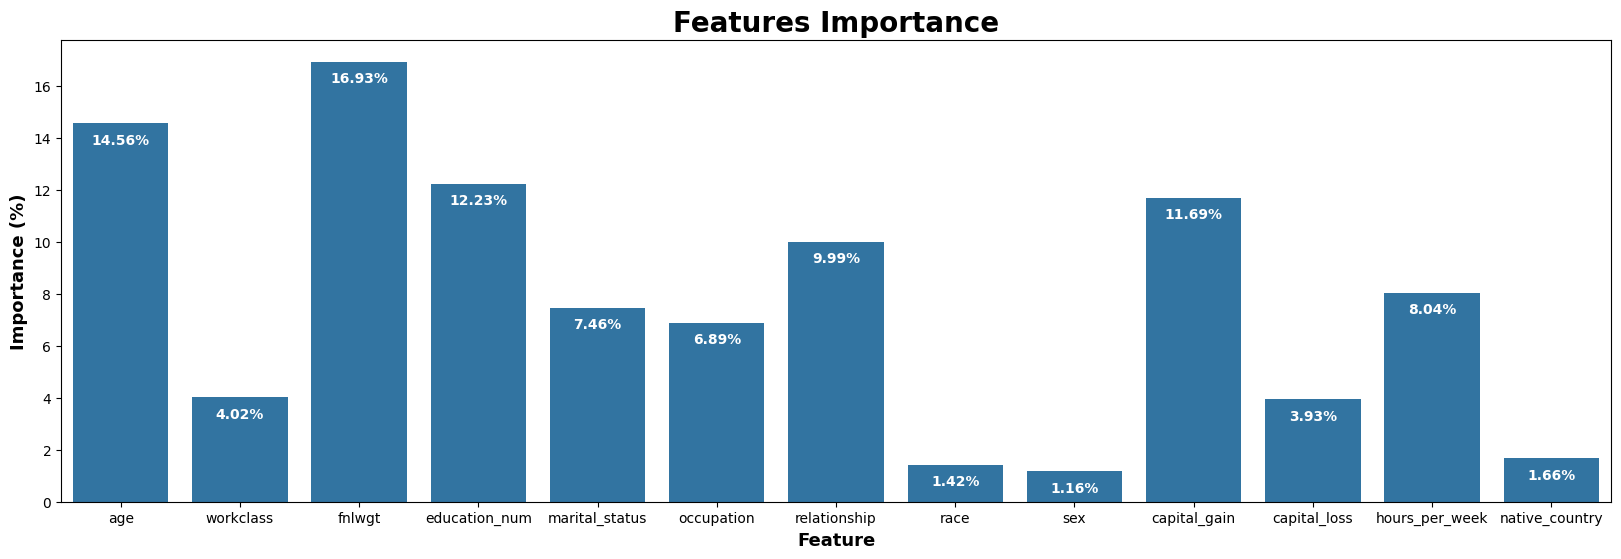

In [129]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);

# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

**Based on the relative importance of features, certain features that have little importance can be dropped from the model. I will drop features that have less than 4% impartance, to speed up the process of fitting the model as well as reduce potential overfitting.**

In [134]:
df_final=df.copy()
df_final.head(2)
df_final.drop(['race', 'sex', 'capital_loss', 'native_country'], axis=1, inplace=True)

# Scalling
numerical = ['age', 'capital_gain', 'hours_per_week', 'fnlwgt']
scaler = MinMaxScaler()
df_final[numerical] = scaler.fit_transform(df_final[numerical])

# Encoding
df_final['income'] = df_final.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
df_final = pd.get_dummies(df_final)

# Partioning
Xf = df_final.drop('income', axis=1)
yf = df_final['income']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999746944353063 | test:  0.9332943474339098
F1-score: train:  0.99997469520372 | test:  0.9366133832951622


# Results

## Load test dataset

In [140]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df_test = pd.read_csv("adult.test", names=names_col)
df_test.drop(labels=0, axis=0, inplace=True)
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [143]:
df_test["age"] = [int(age) for age in df_test['age'].to_list()]

y_test = df_test.income.replace({" <=50K.": 0, " >50K.": 1}) # target
X_test = df_test.drop(["income"], axis= 1)
y_test.value_counts()

income
0    12435
1     3846
Name: count, dtype: int64

## Run Cross-validation (k-fold)

ML model prediction | Classification metric:
Accuracy: 0.8557993730407524
Recall: 0.6226510919248349
Precision: 0.7403381642512077
F1: 0.6764137931034482


ML model prediction | Classification metric:
Accuracy: 0.8565281534300467
Recall: 0.6265060240963856
Precision: 0.7359229147847034
F1: 0.6768208252561618


ML model prediction | Classification metric:
Accuracy: 0.8567828385272604
Recall: 0.631592356687898
Precision: 0.7371394588165329
F1: 0.6802963776070251


ML model prediction | Classification metric:
Accuracy: 0.8579419719695107
Recall: 0.6205927439959121
Precision: 0.7462365591397849
F1: 0.6776398381922165


Accuracy | mean: 0.856763 | min: 0.855799 | max: 0.857942
Recall | mean: 0.625336 | min: 0.620593 | max: 0.631592
Precision | mean: 0.739909 | min: 0.735923 | max: 0.746237
F1 | mean: 0.677793 | min: 0.676414 | max: 0.680296


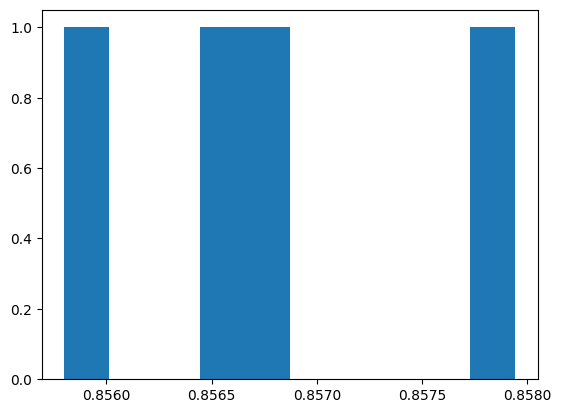

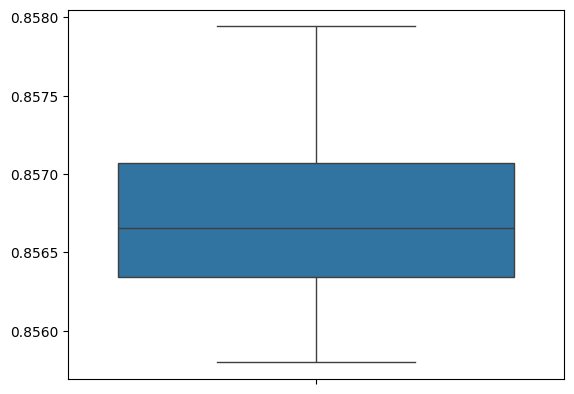

In [164]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


def calc_performance_metrics(model_name, real_y, prediction):
  ##classification metrics
  calc_accuracy=accuracy_score(real_y, prediction)
  calc_recall=recall_score(real_y, prediction)
  calc_precision=precision_score(real_y, prediction)
  calc_f1=f1_score(real_y, prediction)

  print(model_name+' prediction | Classification metric:')
  print('Accuracy:', calc_accuracy)
  print('Recall:', calc_recall)
  print('Precision:', calc_precision)
  print('F1:', calc_f1)
  return calc_accuracy, calc_recall, calc_precision, calc_f1

def cross_validation_prediction(ml_model, X, y):
  list_metrics=[]

  kf=RepeatedKFold(n_splits=2, n_repeats=2, random_state=376)

  train_X, val_X, train_y, val_y=None, None, None, None
  for l_train, l_val in kf.split(X):
    #print(l_train.shape[0], l_val.shape[0])
    train_X, val_X = X.iloc[l_train], X.iloc[l_val]
    train_y, val_y = y.iloc[l_train], y.iloc[l_val]

    ##optimized Random Forest
    ml_model = RandomForestClassifier(n_estimators=500, random_state=376)
    ml_model.fit(train_X, train_y)
    ml_prediction=ml_model.predict(val_X)
    acc, recall, prec, f1=calc_performance_metrics('ML model', val_y, ml_prediction)

    list_metrics.append([acc, recall, prec, f1])

    #plt.barh(features, ml_model.feature_importances_)
    #plt.xlabel("Random Forest feature importance")
    #plt.show()

    print('\n')

  print('Accuracy | mean: %f | min: %f | max: %f'  % (np.mean([list_metrics[i][0] for i in range(len(list_metrics))]), np.min([list_metrics[i][0] for i in range(len(list_metrics))]), np.max([list_metrics[i][0] for i in range(len(list_metrics))])))
  print('Recall | mean: %f | min: %f | max: %f'    % (np.mean([list_metrics[i][1] for i in range(len(list_metrics))]), np.min([list_metrics[i][1] for i in range(len(list_metrics))]), np.max([list_metrics[i][1] for i in range(len(list_metrics))])))
  print('Precision | mean: %f | min: %f | max: %f' % (np.mean([list_metrics[i][2] for i in range(len(list_metrics))]), np.min([list_metrics[i][2] for i in range(len(list_metrics))]), np.max([list_metrics[i][2] for i in range(len(list_metrics))])))
  print('F1 | mean: %f | min: %f | max: %f'        % (np.mean([list_metrics[i][3] for i in range(len(list_metrics))]), np.min([list_metrics[i][3] for i in range(len(list_metrics))]), np.max([list_metrics[i][3] for i in range(len(list_metrics))])))

  ##plotting accuracy values
  plt.hist([list_metrics[i][0] for i in range(len(list_metrics))])
  plt.show()

  sns.boxplot(y=[list_metrics[i][0] for i in range(len(list_metrics))])
  plt.show()


#cross_validation_prediction(rf_model, X, y)
cross_validation_prediction(clf, X, y)

# Final remarks on classification
**From the analysis, it can be seen that it is possible to determine whether a person makes over 50K a year based on census data, with a reasonable accuracy of around 86% in the testing step. However, there are features that are more relevant than others, such as age, working hours-per-week, education level, and these should be better considered in order to increase the accuracy of the models. Furthermore, future dataset collection should try to reduce the imbalance in the dataset by conducting random sampling.**

# Clustering method
**We can also use Clustering to reveal segments of the population with similar characteristics. One clustering methods is to Apply PCA to the data, which can be used on numerical variables.**


In [200]:
# MinMaxScaler to scale the numerical columns so that they fall between 0 and 1

X_numerical=df_final[numerical]
X_numerical.head()
pca = PCA()
model = pca.fit_transform(X_numerical)

In [201]:
# Make function for plotting

# Investigate the variance accounted for by each principal component.

def plot_pc(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT: None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

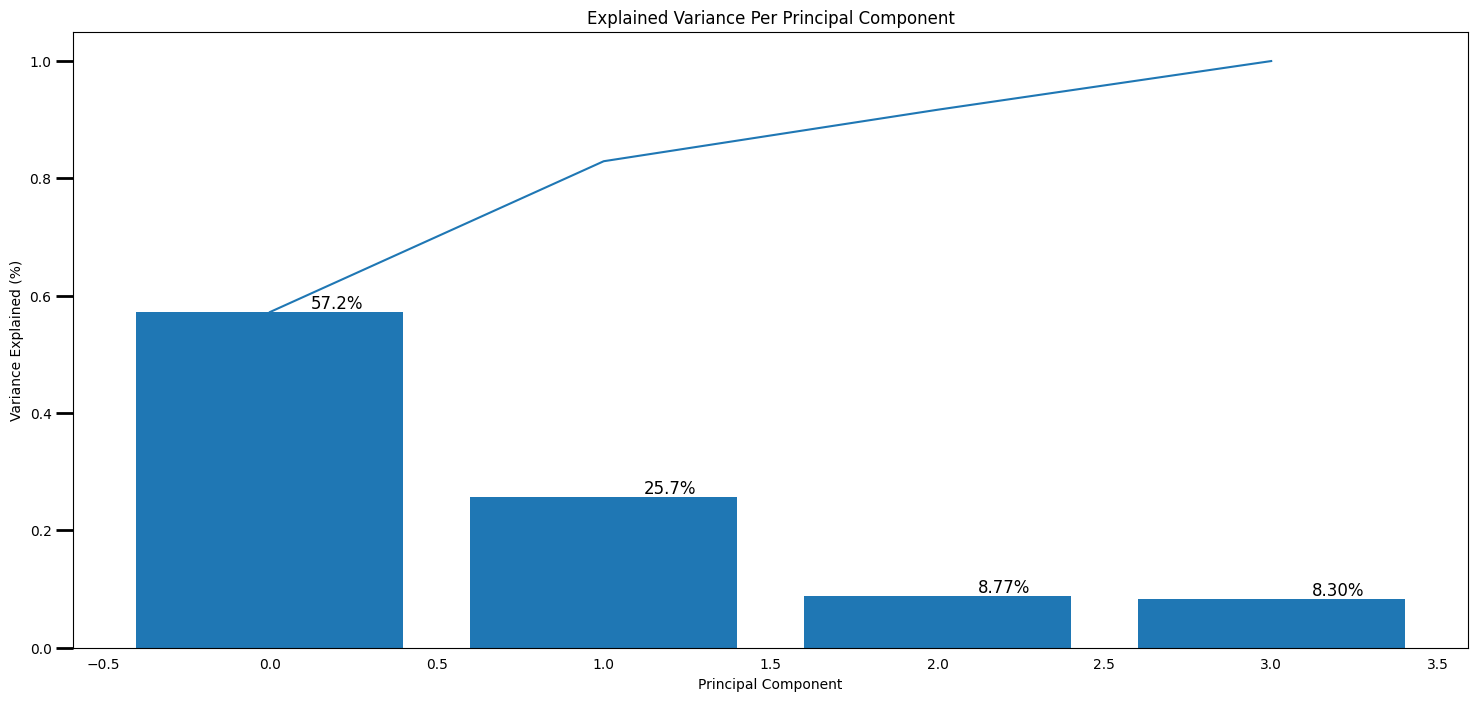

In [202]:
plot_pc(pca)

## Find the appropriarte number of components to retain

In [203]:
# Find appropriate number of components to retain
from time import time

start = time()
for i in np.arange(20, len(pca.explained_variance_ratio_), 3):
    print('For {} components, explained variance:'.format(i), 
          pca.explained_variance_ratio_[:i].sum())
end = time()
print(end - start)

0.00011897087097167969


In [184]:
pca = PCA(n_components=4)
pca_80 = pca.fit_transform(X_numerical)

## Interpret Principal Components

**Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion. To investigate the features, map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list.**

In [204]:
# Define a function to show the weight of each features by dimension
def show_weight(full_dataset, pca, comp_n, feat_n):
    '''
    Display the weight of each feature in dimension i
    INPUT: 
        full_dataset: dataset
        pca: PCA model fitted with data
        comp_n: index of component
        feat_n: feature number
    OUTPUT: weight of each feature 
    '''
    components = pd.DataFrame(np.round(pca.components_, 4), columns=full_dataset.keys()).iloc[comp_n - 1]
    components.sort_values(ascending=False, inplace=True)
    top2n_components = pd.concat([components.head(feat_n), components.tail(feat_n)])

    # Plot the result
    top2n_components.plot(kind='bar', 
                          title='Top {} weighted features for PCA component {}'.format(feat_n*2, comp_n),
                          figsize=(12, 6))
    plt.show()
#     top_components = pd.concat([components.iloc[:5,:],components.iloc[-5:]]).reset_index()
    return top2n_components

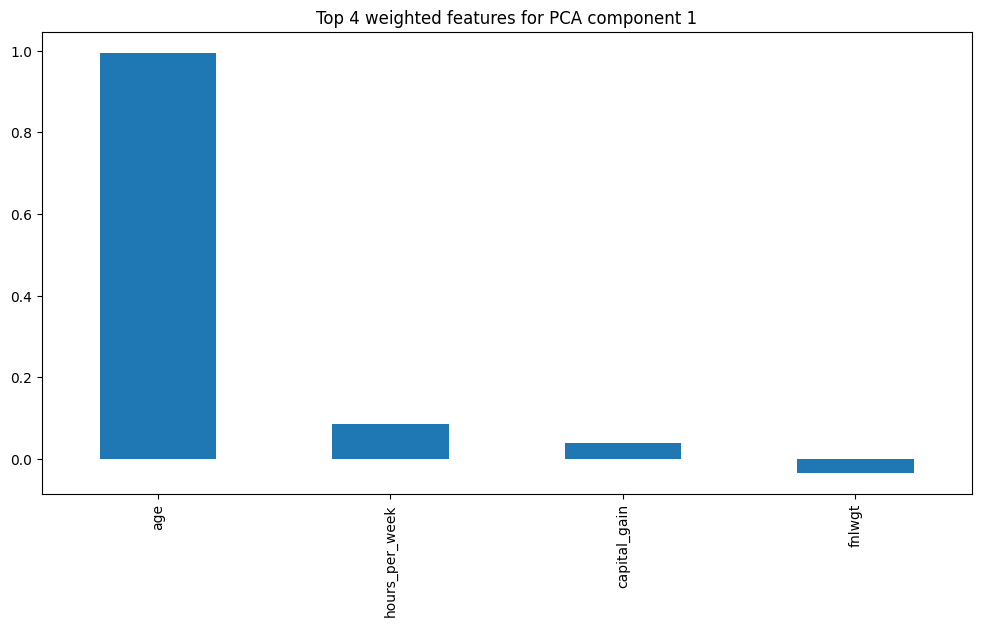

age               0.9950
hours_per_week    0.0851
capital_gain      0.0381
fnlwgt           -0.0345
Name: 0, dtype: float64

In [205]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

components1 = show_weight(X_numerical, pca, 1, 2)
components1

In [207]:
# Investigate the change in within-cluster distance across number of clusters.
def get_kmeans_score(data, center):
    '''
    return the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    # instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    
    # Then fit the model to you data using the fit mothod
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score


In [208]:
scores = []
centers = list(range(1, 12))

start = time()

for center in centers:
    print('Fitting k = {} '.format(center))
    scores.append(get_kmeans_score(pca_80, center))
end = time()

print("--- Run time: %s mins ---" % np.round(((end - start)/60),2))

Fitting k = 1 
Fitting k = 2 
Fitting k = 3 
Fitting k = 4 
Fitting k = 5 
Fitting k = 6 
Fitting k = 7 
Fitting k = 8 
Fitting k = 9 
Fitting k = 10 
Fitting k = 11 
--- Run time: 0.11 mins ---


Text(0.5, 1.0, 'SSE vs. K')

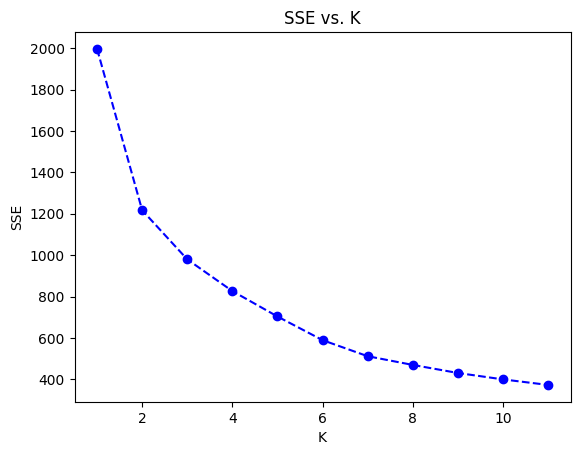

In [209]:
# Plot the SSE value to decide the K value
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')

In [210]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(pca_80)

In [211]:
# Store the prediction
adult_predict = pd.DataFrame(np.array(model.predict(pca_80)), columns=['Prediction'])

# Count the cluster number
cluster_cnt = adult_predict['Prediction'].value_counts().sort_index()
display(cluster_cnt)

cluster_prop = pd.DataFrame((cluster_cnt/cluster_cnt.sum()), columns=['Prediction']).reset_index()
cluster_prop.set_index('index', inplace=True)
display(cluster_prop)

Prediction
0    19003
1    13534
Name: count, dtype: int64

,Prediction
index,


In [199]:
cluster_prop = cluster_prop.reset_index()
cluster_prop.plot(x = 'index', y = 'Prediction', kind = 'bar', figsize = (18,8 ))
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Proportion of persons in cluster')
plt.show()

TypeError: no numeric data to plot